## 1. 文件处理

- 1.1 文件与文件路径
- 1.2 路径操作
- 1.3 文件及文件夹操作
- 1.4 文件读写过程
- 1.5 操作文件和文件夹
- 1.6 遍历目录树
- 1.7 解压缩文件
- 1.8 文件查找

### 1.1 文件与文件路径

文件的两个属性：“路径”和“文件名”，路径指明文件在计算机上的位置，文件名是指该位置的文件的名称。

在windows上，路径书写是使用倒斜杠'\'作为文件夹之间的分隔符，而在OS X和Linux上，是使用正斜杠'/'作为它们的路径分隔符。

### 1.2 路径操作

#### 1.2.1 工作目录

- os.getcwd()：当前工作目录

- os.chdir(path)：切换工作目录

In [ ]:
import os

os.getcwd()  # 获取当前工作目录

'd:\\Github_Repository\\01_Datawhale\\office-automation\\Task01-文件处理与邮件自动化'

In [ ]:
import os

os.chdir('E:\\')  # 改变当前工作目录， os.chdir是不能直接新建文件夹创造路径的
os.getcwd()

'E:\\'

#### 1.2.2 绝对路径和相对路径

- os.path.abspath(path)：将相对路径转换为绝对路径，将返回参数的绝对路径的字符串。

- os.path.isabs(path)：判断是否是绝对路径，是返回True，不是则返回False
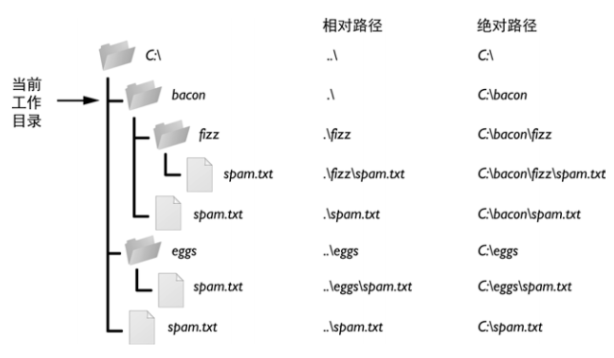

In [1]:
# 可先在C盘目录下创建以下文件夹和文件：
folder_path = 'C:\\os_test'
file_path = 'C:\\os_test\\test.csv'
print(folder_path)
print(file_path)

C:\os_test
C:\os_test\test.csv


In [7]:
os.chdir(folder_path)   

print('当前代码文件路径为：',os.getcwd())
print('转换相对父文件夹为绝对路径：',os.path.abspath('../')) 
print('判断用..代表父路径下是否为绝对路径：',os.path.isabs('../'))
print('判断用绝对父路径下是否为绝对路径：',os.path.isabs(os.path.abspath('../')))

当前代码文件路径为： C:\os_test
转换相对父文件夹为绝对路径： C:\
判断用..代表父路径下是否为绝对路径： False
判断用绝对父路径下是否为绝对路径： True


#### 1.2.3 路径操作

- os.path.relpath(path, start)：返回从start路径到path的相对路径的字符串。

- os.path.dirname(path)：返回当前路径的目录名称。

- os.path.basename(path)：返回当前路径的文件名称。

- os.path.splitext(filename)：返回文件名和扩展名的元组。

- os.path.splitdrive(path)：返回路径的驱动器和路径的元组。

- os.path.normpath(path)：返回规范化的路径。


In [12]:
# 返回从'C:\\'路径到'C:\\os_test'的相对路径的字符串
os.path.relpath(folder_path,'C:\\')

'os_test'

In [10]:
# 返回当前路径的目录名称
os.path.dirname(file_path)

'C:\\os_test'

In [35]:
# 返回当前路径的文件名称, 如果path以／或\结尾，那么就会返回空值
print(os.path.basename(file_path))
print(os.path.basename(folder_path))  # 这里os_test被当作文件名处理了
print(os.path.basename(os.path.join(folder_path, "1.txt")))  # 这里os_test被当作文件名处理了

test.csv
os_test
1.txt


In [48]:
# os.path.join() 连接2个或多个路径名称
print(folder_path)
print(os.path.join(folder_path, "1"))
print(os.path.join(folder_path, "//"))  # 如果是绝对路径(// \\)，在它之前的所有路径都会被忽略
print(os.path.join(folder_path, "\\"))
print(os.path.join(folder_path, "C:\\"))
print(folder_path + "\\")  # 可以用+连接

C:\os_test
C:\os_test\1
C://
C:\
C:\
C:\os_test\


In [101]:
# 获取路径的目录名称和文件名称 以path中最后一个 '\\' 作为分隔符
print(file_path, folder_path)
print(os.path.split(file_path))  # 如果给出的是一个目录和文件名，则输出路径和文件名
print(os.path.split(folder_path))  # 如果给出的是一个目录 无'\\'，会把最后一个目录当作文件名, 输出路径和文件名
print(os.path.split(folder_path + "\\"))  #如果给出的是一个目录 有'\\'，则输出路径和''

C:\os_test\test.csv C:\os_test
('C:\\os_test', 'test.csv')
('C:\\', 'os_test')
('C:\\os_test', '')


In [16]:
# 返回每个文件夹的字符串的列表
file_path.split(os.path.sep)

['C:', 'os_test', 'test.csv']

In [69]:
# 分离文件名与扩展名
filename = os.path.split(file_path)[1]
os.path.splitext(filename)

('test', '.csv')

In [70]:
# 返回路径的驱动器和路径的元组
os.path.splitdrive(file_path)

('C:', '\\os_test\\test.csv')

In [72]:
# 规范化路径
os.path.normpath('c://windows\\System32\\')

'c:\\windows\\System32'

#### 1.2.4 路径有效性检查

- os.path.exists(path)：如果path参数所指的文件或文件夹存在，则返回True，否则返回False。

- os.path.isfile(path)：如果path参数存在，并且是一个文件，则返回True，否则返回False。

- os.path.isdir(path)：如果path参数存在，并且是一个文件夹，则返回True，否则返回False。


In [17]:
# 文件或文件夹存在则返回True，否则返回False
print(os.path.exists('C:\\Windows'))
print(os.path.exists('C:\\else'))

True
False


In [20]:
# 如果是一个文件，返回True，否则返回False
print(os.path.isfile(folder_path))
print(os.path.isfile(file_path))

False
True


In [21]:
# 如果是一个文件夹，返回True，否则返回False
print(os.path.isdir(folder_path))
print(os.path.isdir(file_path))

True
False


### 1.3 文件及文件夹操作

#### 1.3.1 创建新文件夹

- os.makedirs()：创建新文件夹

In [39]:
# 若文件夹已存在, 不会覆盖, 会报错, 因此一般加上判断
if os.path.exists(folder_path):
    print('文件夹已存在')
else:
    os.makedirs(folder_path)  # 可以创建所有必要的中间文件夹

文件夹已存在


#### 1.3.2 查看文件大小和文件夹内容

- os.path.getsize(path)：返回path参数中文件的字节数。

- os.listdir(path):返回文件名字符串的列表，包含path参数中的每个文件。


In [40]:
os.path.getsize(file_path)

53

In [43]:
os.listdir(folder_path)

['demo.xlsx', 'test.csv']

In [45]:
# 目录下所有文件的总字节数
total_size = 0
for filename in os.listdir(folder_path):
    total_size = total_size + os.path.getsize(os.path.join(folder_path, filename))
print(total_size)

9853


### 1.4 文件读写过程

要实现文件读写，首先要获取文件对象，获取文件对象后，就可以使用文件对象的读写方法来读写文件

读写文件3个步骤：

1.调用 *open()* 函数，返回一个File对象。

2.调用File对象的 *read()* 或 *write()* 方法。

3.调用File对象的 *close()* 方法，关闭该文件。

open函数中 常见的对象方法及其作用说明：


![file.png](images/file.png)

#### 1.4.1 打开文件

文件对象可以通过Python内置的open函数得到，完整的语法如下。

open(file,mode=r',buffering=-1,encoding=None,errors=None,newline=None,closefd=True,opener=None)

open函数有8个参数，常用前4个，除了file参数外，其他参数都有默认值。

file指定了要打开的文件名称，应包含文件路径，不写路径则表示文件和当前py脚本在同一个文件夹。

encoding用于指定文件的编码方式，如GBK、UTF-8等，默认采用UTF-8，有时候打开一个文件全是乱码，这是因为编码参数和创建文件时采用的编码方式不一样。

mode指定了文件的打开模式。打开文件的基本模式包括r、w、a，对应读、写、追加写入。附加模式包括b、t、+，表示二进制模式、文本模式、读写模式，附加模式需要和基本模式组合才能使用，如“rb”表示以二进制只读模式打开文件，“rb+”表示以二进制读写模式打开文件。

要注意的是，凡是带w的模式，操作时都要非常谨慎，它首先会清空原文件，但不会有提示。凡是带r的文件必须先存在，否则会因找不到文件而报错。



r : 只读模式，文件不存在则报错，默认模式(文件指针位于文件末尾)

w : 写入模式，文件不存在则自动报错，每次打开会覆盖原文件内容, 文件不关闭则可以进行多次写入（只会在打开文件时清空文件内容）

#### 1.4.2 读取文件

- read(): 以原格式返回全部文本

- readline(): 只返回第一行文本
  
- readlines(): 按行读取文件中的内容，以列表的格式返回全部文本，列表中每个字符串是文本中的一行且以\n结束

In [51]:
f = open(file_path)
f.read()

'name,sex,score\n张三,男,60\n李四,女,80\n王五,男,100\n'

In [54]:
f = open(file_path)
f.readlines()

['name,sex,score\n', '张三,男,60\n', '李四,女,80\n', '王五,男,100\n']

#### 1.4.3 写入文件

需要用“写模式”‘w’和“添加模式”'a'打开一个文件，而不能用读模式打开文件。

“写模式”将覆写原有的文件，从头开始。“添加模式”将在已有文件的末尾添加文本。


In [61]:
txt_path = os.path.join(folder_path, '1.txt')
f = open(txt_path,'w')
f.write('Hello world!\n')
f.close()  # 注意，关闭后，才能完成写入，从txt文件中看到写入的内容。

In [62]:
f = open(txt_path,'a')
f.write('Hi world!\n')
f.close()

In [63]:
f = open(txt_path)
f.read()

'Hello world!\nHi world!\n'

#### 案例：统计字母出现的频率

文件对象有iter、next方法，所以它是一个可迭代对象，可以用for循环遍历。我们可以遍历文件获得每一行字符，再遍历每一行，获得每个字符，将字符放入列表，然后统计每个字符出现的频率。

In [65]:
from collections import Counter

my_list = []
punctuation=',.!?\，。！？、()【】<>《》=：+-*“”...\n'
with open(txt_path, 'r') as f:
    for line in f:
        for word in line:
            if word not in punctuation:
                my_list.append(word)

counter = Counter(my_list)
counter

Counter({'H': 2,
         'e': 1,
         'l': 4,
         'o': 3,
         ' ': 2,
         'w': 2,
         'r': 2,
         'd': 2,
         'i': 1})

### 1.5 操作文件和文件夹

shutil模块

*shutil*(或称为shell工具)模块中包含一些函数，可以在Python程序中复制、移动、改名和删除文件。


![shutil.png](images/shutil.png)


#### 1.5.1 复制


##### 1.5.1.1 复制文件
- shutil.copy(source, destination)：将路径source处的文件复制到路径 destination处的文件夹（source 和 destination 都是字符串），并返回新复制文件绝对路径字符串。

> 其中destination可以是：
> - 一个文件的名称，则将source文件复制为新名称的destination
> - 一个文件夹，则将source文件复制到destination中
> - 若这个文件夹不存在，则将source目标文件内的内容复制到destination中, 若destination文件夹不存在，则自动生成该文件。


In [114]:
import os
import shutil

dest_folder = 'E:\\shutil'
if os.path.exists(dest_folder):
    shutil.copy('E:\\os_test\\1.txt', dest_folder)  # 复制文件

'E:\\shutil\\1.txt'

##### 1.5.1.2 复制文件夹
- shutil.copytree(source, destination):将路径source处的文件夹，包括其包含的文件夹和文件，复制到路径destination处的文件夹

> 注意：destination处的文件夹为新创建的文件夹，如已存在，则会报错


In [8]:
import shutil

dest_folder = 'E:\\shutil'
if not os.path.exists(dest_folder):
    shutil.copytree(folder_path, dest_folder)  # dest_folder必须不存在
else:
    print("目录已存在！")

#### 1.5.2 移动与改名

- shutil.move(source, destination)：将路径 source 处的文件/文件夹移动到路径destination，并返回新位置的绝对路径的字符串。

> - 如果source和destination是文件夹，且destination已存在，则会将source文件夹下所有内容复制到destination文件夹中。移动。
> - 如果source是文件夹，destination不存在，则会将source文件夹下所有内容复制到destination文件夹中，source原文件夹名称将被替换为destination文件夹名。   移动+重命名
> - 如果source和destination是文件，source处的文件将被移动到destination处的位置，并以destination处的文件名进行命名。  移动+重命名。

> 注意：如果destination中有原来已经存在同名文件，移动后，会被覆写，所以应当特别注意。


In [9]:
import shutil

dest_folder = 'E:\\shutil'
shutil.move(folder_path, dest_folder)

'E:\\shutil'

#### 1.5.3 永久删除

- os.unlink(path): 删除path处的文件。

- os.rmdir(path): 删除path处的文件夹。该文件夹必须为空，其中没有任何文件和文件夹。

- shutil.rmtree(path): 删除path处的文件夹，它包含的所有文件和文件夹都会被删除。

> 注意：使用时，需要非常小心，避免删错文件，不经过回收站。


In [10]:
import os
import shutil

shutil.rmtree(dest_folder)  # 删除目录

#### 1.5.4 安全删除

*shutil.rmtree(path)* 会不可恢复的删除文件和文件夹，用起来会有危险。

因此使用第三方的 *send2trash* 模块，可以将文件或文件夹发送到计算机的回收站，而不是永久删除。用 *send2trash* 删除的某些你不想删除的东西，稍后可以从回收站恢复。


In [113]:
import os
import send2trash

file_path = 'E:\\1.txt'
folder_path = 'E:\\os_test'
if os.path.exists(file_path):
    send2trash.send2trash(file_path)  # 删除文件

if os.path.exists(folder_path):
    send2trash.send2trash(folder_path)  # 删除文件夹

### 1.6 遍历目录树

os.walk(path): 用于通过在目录树中游走输出在目录中的文件名。os.walk()在循环的每次迭代中，返回三个值：

root 当前正在访问的文件夹路径

dirs 该文件夹下的子目录名list

files 该文件夹下的文件list

In [91]:
import os

# topdown 默认为True，优先遍历 top 目录，否则优先遍历 top 的子目录
for root, dirs, files in os.walk(folder_path, topdown=True):
    # root 当前正在访问的文件夹路径
    # dirs 该文件夹下的子目录名list
    # files 该文件夹下的文件list
    print("1.当前正在访问的文件夹路径", root)

    for sub_dir in dirs:
        print("2.该文件夹下的子目录名list", os.path.join(root, sub_dir))
    
    for file in files:
        print("3.该文件夹下的文件list", os.path.join(root, file))
    print('')   

1.当前正在访问的文件夹路径 C:\os_test
2.该文件夹下的子目录名list C:\os_test\new_folder
3.该文件夹下的文件list C:\os_test\1.txt
3.该文件夹下的文件list C:\os_test\demo.xlsx
3.该文件夹下的文件list C:\os_test\test.csv

1.当前正在访问的文件夹路径 C:\os_test\new_folder
3.该文件夹下的文件list C:\os_test\new_folder\sub_1.txt



In [92]:
import os

# topdown 默认为True，优先遍历 top 目录，否则优先遍历 top 的子目录
for root, dirs, files in os.walk(folder_path, topdown=False):  # 优先遍历 top 的子目录
    # root 当前正在访问的文件夹路径
    # dirs 该文件夹下的子目录名list
    # files 该文件夹下的文件list
    print("1.当前正在访问的文件夹路径", root)

    for sub_dir in dirs:
        print("2.该文件夹下的子目录名list", os.path.join(root, sub_dir))
    
    for file in files:
        print("3.该文件夹下的文件list", os.path.join(root, file))
    print('') 

1.当前正在访问的文件夹路径 C:\os_test\new_folder
3.该文件夹下的文件list C:\os_test\new_folder\sub_1.txt

1.当前正在访问的文件夹路径 C:\os_test
2.该文件夹下的子目录名list C:\os_test\new_folder
3.该文件夹下的文件list C:\os_test\1.txt
3.该文件夹下的文件list C:\os_test\demo.xlsx
3.该文件夹下的文件list C:\os_test\test.csv



### 1.7 解压缩文件

利用zipfile模块中的函数可以创建和打开（或解压）zip文件。

#### 1.7.1 创建和添加到zip文件

In [104]:
# 将os_test文件夹下所有文件进行压缩
import os
import zipfile

newZip = zipfile.ZipFile('E:\\os_test.zip', 'w', zipfile.ZIP_DEFLATED)
for root, dirs, files in os.walk('E:\\os_test'):
    for file in files:
        newZip.write(os.path.join(root, file))  # 给压缩文件中添加文件
newZip.close()

In [102]:
# 封装成函数版本
import os
import zipfile


def zip_folder(source_folder_path):
    """压缩文件夹(C盘存在权限问题)"""
    z = zipfile.ZipFile(source_folder_path + '.zip', 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(source_folder_path):
        for file in files:
            z.write(os.path.join(root, file))  # 给压缩文件中添加文件
    z.close()


# 被压缩的文件夹路径
folder_path = "E:\\os_test"
zip_folder(folder_path)

#### 1.7.2 读取zip文件

In [104]:
import os
import zipfile

z = zipfile.ZipFile('E:\\os_test.zip')
z.namelist()  # 获取压缩文件中的文件名

['1.txt', 'demo.xlsx', 'new_folder/', 'new_folder/sub_1.txt', 'test.csv']

In [112]:
z_info = z.getinfo('1.txt')
print(z_info.file_size)  # 获取文件大小
print(z_info.compress_size)  # 获取压缩后的大小

25
19


#### 1.7.3 从zip文件中解压缩

In [111]:
import os
import zipfile

zip_folder_path = 'E:\\os_test.zip'
z = zipfile.ZipFile(zip_folder_path)
z.extractall(zip_folder_path[:-4])  # 解压到原来的文件夹中
z.close()

### 1.8 文件查找

对于文件操作，最需要熟练掌握的就是查找文件。

前面介绍了使用os.listdir、os.walk方法可以批量列出当前工作目录的全部文件，下面介绍常用于查找特定文件的模块。

#### 1.8.1 glob模块

glob是Python自带的一个文件操作相关模块，用它可以查找符合条件的文件。

这里主要是写匹配条件，“*”匹配任意个字符，“?”匹配单个字符，也可以用“[]”匹配指定范围内的字符，如[0-9]匹配数字。


- glob.glob('*[0-9]*.*') 可以匹配当前目录下文件名中带有数字的文件。

- glob.glob(r'G:\*') 可以获取G盘下的所有文件和文件夹，但是它不会进一步列明文件夹下的文件。

In [73]:
# 找到当前目录下全部的.txt文档
import glob
glob.glob('*.txt')

['1.txt']

#### 1.8.2 fnmatch模块

fnmatch 是专门用来进行文件名匹配的模块，使用它可以完成更为复杂的文件名匹配。最常用的是fnmatch函数，其语法如下。

fnmatch.fnmatch(filename, pattern)  

pattern表示匹配条件，测试文件名filename是否符合匹配条件，函数返回True或者False

In [79]:
# 找出目标文件夹里所有结尾带数字的文件
import os, fnmatch

for root, dirs, filenames in os.walk(folder_path):
    for filename in filenames:
        if fnmatch.fnmatch(filename, '*[0-9].*'):
            print(filename)

1.txt


#### 1.8.3 hashlib模块

重复文件可能有不同的文件名，不能简单用文件名和文件大小来判断。最简单的办法就是通过MD5来确定两个文件是不是一样的。

电子文件容易被篡改或者伪造，在出现纠纷时，怎么提供有力的证据来证明文件的真实性？一个可行的办法就是制作文件后对整个文件生成MD5值。一旦MD5值生成之后，文件发生过任何修改，MD5值都将改变，通过此方法可以确定文件是否被篡改过。


In [77]:
# 获取文件MD5值
import hashlib

m = hashlib.md5()
f = open('1.txt', 'rb')
m.update(f.read())
f.close()
md5_value = m.hexdigest()
print(md5_value)

f70ac7ad51e95a48c21078aec6976fb1
